## Import necessary modules

In [2]:
from pprint import pprint
import numpy as np
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objects as go

import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import DistanceMetric
from kmodes.kprototypes import KPrototypes


import math

## Model Building

In [3]:
dataPath = "./okcupid_profiles_preprocessed.csv"

df = pd.read_csv(dataPath)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59946 non-null  float64
 11  income       11504 non-null  float64
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         59946 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [38]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             0
income         48442
job             8198
last_online        0
location           0
offspring      35561
pets               0
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
city_              0
state_             0
body_type_         0
education_         0
drinks_            0
drugs_             0
smokes_            0
likes_dogs_        0
likes_cats_        0
dtype: int64

## Use only non-null attributes

In [4]:
features = ['age', 'height', 'status', 'sex', 'orientation', 'body_type_', 'education_', 'drinks_', 'drugs_', 'smokes_', 'likes_dogs_', 'likes_cats_']

dfFeatures = df[features]
dfFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   height       59946 non-null  float64
 2   status       59946 non-null  object 
 3   sex          59946 non-null  object 
 4   orientation  59946 non-null  object 
 5   body_type_   59946 non-null  object 
 6   education_   59946 non-null  object 
 7   drinks_      59946 non-null  object 
 8   drugs_       59946 non-null  object 
 9   smokes_      59946 non-null  object 
 10  likes_dogs_  59946 non-null  object 
 11  likes_cats_  59946 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.5+ MB


In [42]:
dfFeatures.isna().sum()

age            0
height         0
status         0
sex            0
orientation    0
body_type_     0
education_     0
drinks_        0
drugs_         0
smokes_        0
likes_dogs_    0
likes_cats_    0
dtype: int64

In [6]:
dfFeatures.head()

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
0,22,190.0,single,m,straight,endomorph,College or more,socially,never,sometimes,Yes,Yes
1,35,178.0,single,m,straight,mesomorph,College or more,often,sometimes,no,Yes,Yes
2,38,173.0,available,m,straight,ectomorph,College or more,socially,never,no,No,Yes
3,23,180.0,single,m,straight,ectomorph,College or more,socially,never,no,No,Yes
4,29,168.0,single,m,straight,mesomorph,College or more,socially,never,no,Yes,Yes


In [43]:
dfFeatures.describe(include='all')

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
count,59946.000000,59946.000000,59946,59946,59946,59946,59946,59946,59946,59946,59946,59946
unique,NaN,NaN,5,2,3,3,4,6,3,3,2,2
top,NaN,NaN,single,m,straight,mesomorph,College or more,socially,never,no,Yes,No
freq,NaN,NaN,55697,35829,51606,45541,52369,44765,51804,49408,36873,34222
mean,32.340290,173.459947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,10.108937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,168.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,173.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Not so many unique categorical labels so we could use OHE

#### One Hot Encoding + Factorial Analysis of Mixed Data (FAMD)

In [5]:
from tqdm.notebook import tqdm_notebook


def calculate_zscore(df, columns):
  '''
  scales columns in dataframe using z-score
  '''
  df = df.copy()
  for col in columns:
      df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

  return df

def create_elbow_plot(df, categorical, space=(2,11)):

  costs = {}
  # n_clusters = []
  clusters_assigned = []
  categorical = list(categorical)
  print(categorical)

  for i in tqdm_notebook(range(space[0], space[1])):

        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=0)
        clusters = kproto.fit_predict(df, categorical=categorical)
        costs[i] = kproto.cost_
        # n_clusters.append(i)
        clusters_assigned.append(clusters)
  
  # use plotly to plot costs with respect to number of clusters
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(costs.keys()), y=list(costs.values()), mode='lines+markers'))
  fig.update_layout(title='Elbow Plot', xaxis_title='Number of Clusters', yaxis_title='Cost')
  fig.show()

  return costs, clusters_assigned

def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]



In [74]:
k_protype_data = dfFeatures.copy()

numeric_cols = k_protype_data.select_dtypes(include=np.number)
cat_cols = k_protype_data.select_dtypes(include='object')

# norm_num_cols = calculate_zscore(numeric_cols, numeric_cols)
# processed_df = pd.concat([norm_num_cols, cat_cols], axis=1)

categorical_indices = column_index(k_protype_data, cat_cols.columns)
cost, clustersAssigned = create_elbow_plot(k_protype_data, categorical_indices, space=(2,12))


[np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]


  0%|          | 0/10 [00:00<?, ?it/s]

4 can be taken as an elbow point

In [10]:
fitData = dfFeatures.copy()

cat_cols = fitData.select_dtypes(include='object')
categorical_indices = column_index(fitData, cat_cols.columns)

# model building
k = 6
kproto =  KPrototypes(n_clusters= k, init='Cao', verbose=0)

clusters = kproto.fit_predict(fitData, categorical=list(categorical_indices))

fitData['cluster'] = clusters

fitData

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_,cluster
0,22,190.0,single,m,straight,endomorph,College or more,socially,never,sometimes,Yes,Yes,1
1,35,178.0,single,m,straight,mesomorph,College or more,often,sometimes,no,Yes,Yes,5
2,38,173.0,available,m,straight,ectomorph,College or more,socially,never,no,No,Yes,5
3,23,180.0,single,m,straight,ectomorph,College or more,socially,never,no,No,Yes,1
4,29,168.0,single,m,straight,mesomorph,College or more,socially,never,no,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,157.0,single,f,straight,mesomorph,College or more,socially,never,no,Yes,No,3
59942,24,183.0,single,m,straight,mesomorph,College or more,often,sometimes,no,Yes,Yes,1
59943,42,180.0,single,m,straight,mesomorph,College or more,not at all,never,no,No,No,5
59944,27,185.0,single,m,straight,mesomorph,College or more,socially,often,sometimes,Yes,Yes,1


## Try umap

In [37]:
import umap.umap_ as umap

def plot_umap(df):

    numerical = df.select_dtypes(exclude='object')

    for col in numerical.columns:
        numerical[col] = (numerical[col] - numerical[col].mean())/numerical[col].std(ddof=0)
        
    ##preprocessing categorical
    categorical = df.select_dtypes(include='object')
    categorical = pd.get_dummies(categorical)

    #Percentage of columns which are categorical is used as weight parameter in embeddings later
    categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

    #Embedding numerical & categorical
    fit1 = umap.UMAP(metric='l2').fit(numerical)
    fit2 = umap.UMAP(metric='dice').fit(categorical)

    #Augmenting the numerical embedding with categorical
    intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
    intersection = umap.reset_local_connectivity(intersection)
    embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                    fit1._initial_alpha, fit1._a, fit1._b, 
                                                    fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                    200, 'random', np.random, fit1.metric, 
                                                    fit1._metric_kwds, False, None, None)
    
    return fit1, fit2, intersection, categorical_weight, embedding
    # print(embedding)
    # plt.figure(figsize=(20, 10))
    # plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
    # plt.show()

In [38]:
fit1, fit2, intersection, categorical_weight, umapEmbedding = plot_umap(fitData.drop('cluster', axis=1))
umapEmbedding

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/lib/python3.13/site-packages/umap/umap_.py:1887: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



(array([[ 1.2709855 ,  5.372785  ],
        [17.077534  ,  3.0871568 ],
        [ 0.69231284,  5.4495764 ],
        ...,
        [ 9.235788  , 14.517109  ],
        [11.820884  , 12.12268   ],
        [-0.369385  ,  4.307292  ]], dtype=float32),
 {})

In [39]:
fit1, fit2, intersection, categorical_weight 

(UMAP(metric='l2', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 UMAP(angular_rp_forest=True, metric='dice', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 <Compressed Sparse Row sparse matrix of dtype 'float32'
 	with 2111794 stored elements and shape (59946, 59946)>,
 0.8333333333333334)

In [40]:
import pickle

obj = {'fit1': fit1, 'fit2': fit2, 'intersection': intersection, 'categorical_weight': categorical_weight}

with open("./dumps/umapEmbedding.pkl", "wb") as f:
    pickle.dump(obj, f)


In [41]:
def get_embedding_for_single_row(new_row, fit1, fit2, intersection, categorical_weight, num_cols, cat_cols):
    """
    Generate UMAP embedding for a single new row, incorporating intersection and connectivity.
    """

    # Extract numerical and categorical data
    num_data = new_row[num_cols].astype(float).to_frame().T
    cat_data = new_row[cat_cols].astype(str).to_frame().T

    # Standardize numerical data using the same transformation as training
    num_data = (num_data - fit1._raw_data.mean(axis=0)) / fit1._raw_data.std(axis=0)

    # One-hot encode categorical data (ensure it has the same columns as training)
    cat_data = pd.get_dummies(cat_data).reindex(columns=cat_cols, fill_value=0)

    # Transform new row using the trained UMAP models
    num_embedding = fit1.transform(num_data)
    cat_embedding = fit2.transform(cat_data)

    # Compute augmented embedding using intersection
    embedding = umap.simplicial_set_embedding(
        num_data.to_numpy(),
        intersection,
        fit1.n_components,
        fit1._initial_alpha,
        fit1._a,
        fit1._b,
        fit1.repulsion_strength,
        fit1.negative_sample_rate,
        200,  # Number of epochs
        'random',
        np.random,
        fit1.metric,
        fit1._metric_kwds,
        False,
        None,
        None
    )

    return embedding

In [46]:
numCols = dfFeatures.select_dtypes(include=np.number).columns
catCols = dfFeatures.select_dtypes(include='object').columns

In [43]:
dfFeatures.iloc[13]

age                             30
height                       168.0
status                      single
sex                              f
orientation               straight
body_type_               ectomorph
education_     High school or less
drinks_                   socially
drugs_                       never
smokes_                         no
likes_dogs_                    Yes
likes_cats_                    Yes
Name: 13, dtype: object

In [47]:
get_embedding_for_single_row(dfFeatures.iloc[12], fit1, fit2, intersection, categorical_weight, numCols, catCols)

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



(array([[  6.9949203,  11.282814 ],
        [  8.663788 ,   9.253081 ],
        [  6.5044465,  12.534104 ],
        ...,
        [-12.585646 ,   0.8772063],
        [ 16.06036  ,  -2.8550885],
        [ 15.275352 ,  -1.826666 ]], dtype=float32),
 {})

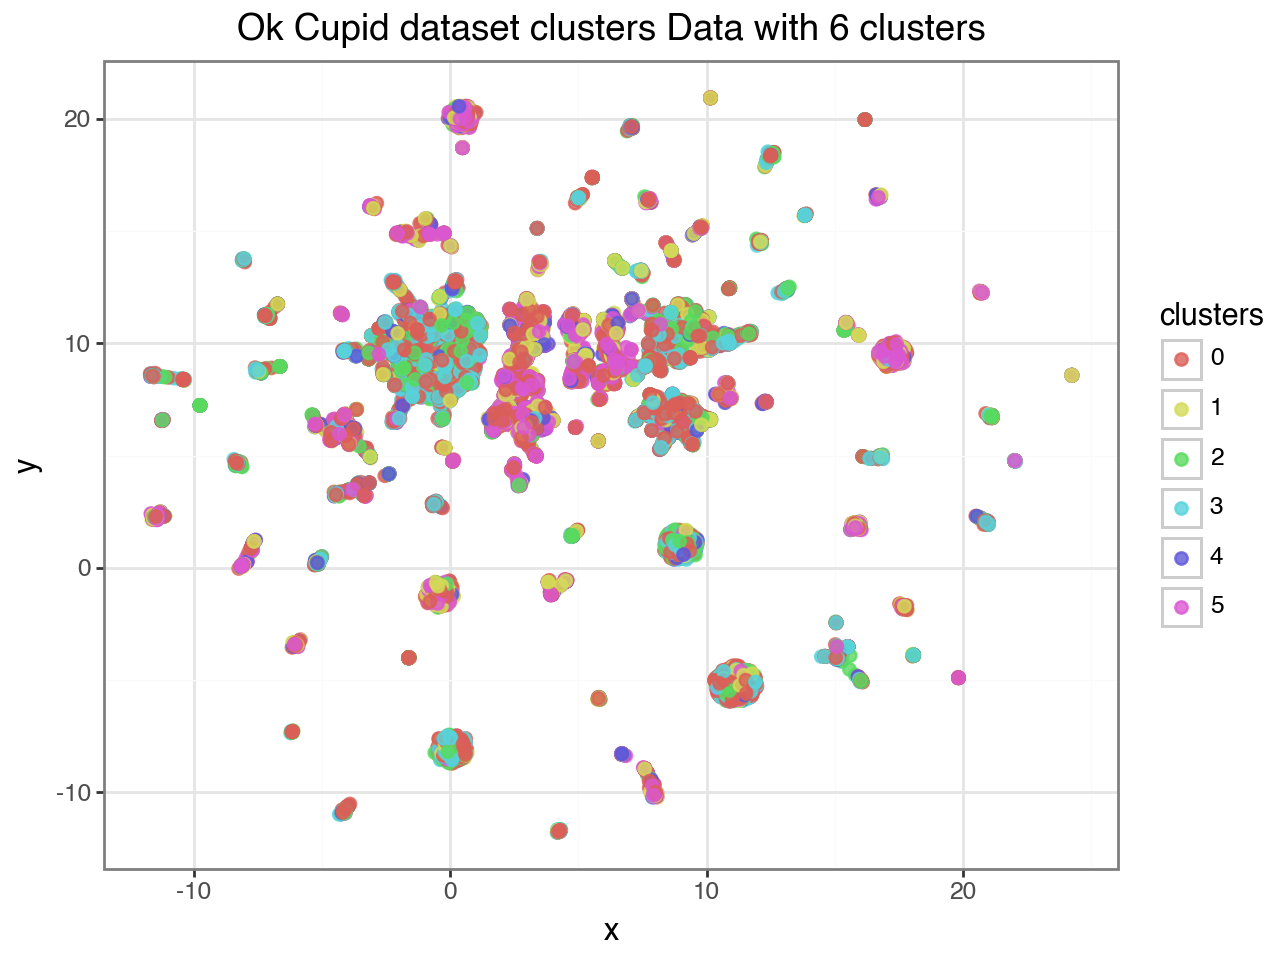

In [77]:
import plotnine as p9

k_proto_umap = pd.DataFrame({'x':umapEmbedding[0][:,0],
                             'y':umapEmbedding[0][:,1],
                             'clusters': fitData['cluster'],
                            #  'target':labels
                            })



k_proto_umap['clusters'] = k_proto_umap['clusters'].apply(str)

p1 = (p9.ggplot(k_proto_umap, p9.aes(x='x', y='y', fill='clusters', color='clusters'))
                + p9.geom_point(alpha=0.8, size=2)
                + p9.ggtitle(f'Ok Cupid dataset clusters Data with {k} clusters')
                + p9.theme_bw())
p1


## Testing the model

In [12]:
testData = fitData.iloc[10]
print(testData)
testData = testData.drop('cluster')
testData

age                         35
height                   178.0
status               available
sex                          m
orientation           straight
body_type_           mesomorph
education_     College or more
drinks_               socially
drugs_                   never
smokes_                    yes
likes_dogs_                 No
likes_cats_                 No
cluster                      5
Name: 10, dtype: object


age                         35
height                   178.0
status               available
sex                          m
orientation           straight
body_type_           mesomorph
education_     College or more
drinks_               socially
drugs_                   never
smokes_                    yes
likes_dogs_                 No
likes_cats_                 No
Name: 10, dtype: object

In [13]:
kproto.predict(np.asarray([testData]), categorical=list(categorical_indices))

array([5], dtype=uint16)

# K means

In [14]:
dfFeatures.head()

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
0,22,190.0,single,m,straight,endomorph,College or more,socially,never,sometimes,Yes,Yes
1,35,178.0,single,m,straight,mesomorph,College or more,often,sometimes,no,Yes,Yes
2,38,173.0,available,m,straight,ectomorph,College or more,socially,never,no,No,Yes
3,23,180.0,single,m,straight,ectomorph,College or more,socially,never,no,No,Yes
4,29,168.0,single,m,straight,mesomorph,College or more,socially,never,no,Yes,Yes


In [52]:
## label encode
dfEncoded = dfFeatures.copy()
encodings = {}


for col in dfEncoded.columns:
    if df[col].dtype == 'object':
        labelEncoder = LabelEncoder()

        dfEncoded[col] = labelEncoder.fit_transform(dfEncoded[col])
        encodings[col] = labelEncoder

        encodings[col] = labelEncoder
    
    scaler = StandardScaler()
    dfEncoded[col] = scaler.fit_transform(dfEncoded[col].values.reshape(-1, 1))


print(encodings)
dfEncoded

{'status': LabelEncoder(), 'sex': LabelEncoder(), 'orientation': LabelEncoder(), 'body_type_': LabelEncoder(), 'education_': LabelEncoder(), 'drinks_': LabelEncoder(), 'drugs_': LabelEncoder(), 'smokes_': LabelEncoder(), 'likes_dogs_': LabelEncoder(), 'likes_cats_': LabelEncoder()}


,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
0,-1.093898,1.636195,0.245286,0.820435,0.375658,-0.954800,-0.356375,0.493551,-0.393591,1.599558,0.791039,1.153409
1,0.281370,0.449117,0.245286,0.820435,0.375658,0.524254,-0.356375,-1.705936,2.579097,-0.432939,0.791039,1.153409
2,0.598740,-0.045499,-5.089302,0.820435,0.375658,-2.433855,-0.356375,0.493551,-0.393591,-0.432939,-1.264160,1.153409
3,-0.988108,0.646963,0.245286,0.820435,0.375658,-2.433855,-0.356375,0.493551,-0.393591,-0.432939,-1.264160,1.153409
4,-0.353369,-0.540115,0.245286,0.820435,0.375658,0.524254,-0.356375,0.493551,-0.393591,-0.432939,0.791039,1.153409
...,...,...,...,...,...,...,...,...,...,...,...,...
59941,2.820327,-1.628271,0.245286,-1.218865,0.375658,0.524254,-0.356375,0.493551,-0.393591,-0.432939,0.791039,-0.866995
59942,-0.882318,0.943732,0.245286,0.820435,0.375658,0.524254,-0.356375,-1.705936,2.579097,-0.432939,0.791039,1.153409
59943,1.021900,0.646963,0.245286,0.820435,0.375658,0.524254,-0.356375,-2.805679,-0.393591,-0.432939,-1.264160,-0.866995
59944,-0.564949,1.141579,0.245286,0.820435,0.375658,0.524254,-0.356375,0.493551,1.092753,1.599558,0.791039,1.153409


In [98]:
def create_elbow_plot_kmeans(df, space=(2,11)):

    costs = {}
    # n_clusters = []
    clusters_assigned = []

    for i in tqdm_notebook(range(space[0], space[1])):

        kmeans = KMeans(n_clusters=i, n_init='auto')

        clusters = kmeans.fit_predict(df)
        costs[i] = kmeans.inertia_
        clusters_assigned.append(clusters)

    # use plotly to plot costs with respect to number of clusters
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(costs.keys()), y=list(costs.values()), mode='lines+markers'))
    fig.update_layout(title='Elbow Plot for KMeans', xaxis_title='Number of Clusters', yaxis_title='Cost')
    fig.show()

    return costs, clusters_assigned

create_elbow_plot_kmeans(dfEncoded, space=(2,12))

  0%|          | 0/10 [00:00<?, ?it/s]

({2: 650631.0783667623,
  3: 580439.1810378712,
  4: 526079.0223140075,
  5: 510336.64360877,
  6: 490944.5413269059,
  7: 427249.8282060205,
  8: 423004.4949249808,
  9: 389326.17595863226,
  10: 374175.69208655576,
  11: 354604.46332076815},
 [array([0, 1, 1, ..., 0, 1, 0], dtype=int32),
  array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
  array([3, 1, 0, ..., 3, 1, 3], dtype=int32),
  array([1, 0, 1, ..., 4, 1, 1], dtype=int32),
  array([1, 4, 0, ..., 3, 1, 1], dtype=int32),
  array([1, 3, 5, ..., 4, 1, 1], dtype=int32),
  array([2, 5, 7, ..., 6, 2, 2], dtype=int32),
  array([2, 3, 8, ..., 0, 2, 2], dtype=int32),
  array([3, 2, 4, ..., 2, 9, 3], dtype=int32),
  array([1, 8, 7, ..., 6, 1, 1], dtype=int32)])

In [16]:
k = 7
kmeans = KMeans(n_clusters = k, n_init='auto')

clusters = kmeans.fit_predict(dfEncoded)
print(clusters)
kmeans

[3 3 1 ... 6 3 3]


KMeans(n_clusters=7)

In [17]:
def plot_pca(df, clusters, n_components=2):
    df = df.copy()
    
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    
    principalDf['cluster'] = clusters.astype(str)
    # don't have continuous color scale
    fig = px.scatter(principalDf, x='principal component 1', y='principal component 2', 
                color='cluster', opacity=0.6, title=f'PCA with {n_components} components')
    fig.show()
    

plot_pca(dfEncoded, clusters)

## Try to find the closest users

In [112]:
def distance(row, user):
    result = 0
    for i, v in enumerate(row):
        result += (v - user[i])**2
    return result ** 0.5

In [117]:
df.loc[42:42,features]

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
42,30,190.0,single,m,straight,mesomorph,College or more,often,sometimes,no,No,No


In [118]:
df['cluster'] = clusters

In [120]:
users = df.loc[(df.sex == 'f') & 
               (df.cluster == df.at[42, 'cluster']) & 
               (df.orientation == 'straight')].index
print(f'And so we have found {len(users)} female users in the same cluster.\n ')

And so we have found 1553 female users in the same cluster.
 


In [122]:
user = dfEncoded.loc[42]
distances = dfEncoded.loc[users].apply(distance, axis = 1, args=(user,) ).sort_values()

distances

/var/folders/cj/0ysx3z4x6bz0l8bp_d1wq4_h0000gn/T/ipykernel_50845/3542383353.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


31343    2.217665
55767    2.522013
13776    2.530873
42326    2.576885
16932    2.576885
           ...   
51175    8.116558
56116    8.292546
57286    8.355164
9121     8.417864
17050    9.631499
Length: 1553, dtype: float64

### Affinity

We can calculate affinity (similarity) with this [formula](https://scikit-learn.org/stable/modules/metrics.html):

S = np.exp(-D * gamma), where D is the distance between the two data points, and gamma is 1 / num_features.

In [81]:
gamma = 1 /(len(features))
gamma

0.08333333333333333

And now we can print the top ten choices for the user 42 with a similarity score:

In [123]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100,1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top ten users by affinity with user_id = 42')
S.head(10)

Top ten users by affinity with user_id = 42


,affinity
user_id,
31343,83.1
55767,81.0
13776,81.0
42326,80.7
16932,80.7
6363,80.4
33695,80.1
5879,80.0
40510,79.9


### Export models

In [1]:
encodings

NameError: name 'encodings' is not defined

In [23]:
kmeans

KMeans(n_clusters=7)

In [54]:
import pickle, json

with open("./dumps/encodings.dat", "wb") as f:
    # encodings = {k: list(v) for k, v in encodings.items()}
    pickle.dump(encodings, f)

with open("./dumps/kprototype.dat", "wb") as f:
    pickle.dump(kproto, f)

with open("./dumps/kmeans.dat", "wb") as f:
    pickle.dump(kmeans, f)


In [27]:
df[features].sample(10)

,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
22207,33,190.0,single,m,straight,mesomorph,College or more,socially,never,no,Yes,No
722,38,178.0,single,m,straight,mesomorph,College or more,not at all,never,no,Yes,Yes


In [57]:
def load_model():
    with open('dumps/kprototype.dat', 'rb') as f:
        kproto = pickle.load(f)


    with open('dumps/kmeans.dat', 'rb') as f:
        kmeans = pickle.load(f)

    with open('dumps/encodings.dat', 'rb') as f:
        encodings = pickle.load(f)

    return encodings, kproto, kmeans

encodings = load_model()[0]

In [63]:
encodings['orientation'].transform(df['orientation'])

array([2, 2, 2, ..., 2, 2, 1])

In [58]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(encodings[col].classes_)

['available' 'married' 'seeing someone' 'single' 'unknown']
['f' 'm']
['bisexual' 'gay' 'straight']


KeyError: 'body_type'

In [ ]:
def encodeDf(df):

    for col in df.columns:
        if df[col].dtype == 'object':
            lc = encodings[col]

            df[col] = lc.transform(df[col])
        
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))


def plotClusters(df, row):

    df = df.copy()
    df.loc[len(df)] = row

    encodeDf(df)

df1 = dfFeatures.copy()
# print(df1.head())
encodeDf(df1)
df1

   age  height     status sex orientation body_type_       education_  \
0   22   190.0     single   m    straight  endomorph  College or more   
1   35   178.0     single   m    straight  mesomorph  College or more   
2   38   173.0  available   m    straight  ectomorph  College or more   
3   23   180.0     single   m    straight  ectomorph  College or more   
4   29   168.0     single   m    straight  mesomorph  College or more   

    drinks_     drugs_    smokes_ likes_dogs_ likes_cats_  
0  socially      never  sometimes         Yes         Yes  
1     often  sometimes         no         Yes         Yes  
2  socially      never         no          No         Yes  
3  socially      never         no          No         Yes  
4  socially      never         no         Yes         Yes  


,age,height,status,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
0,-1.093898,1.636195,0.245286,0.820435,0.375658,-0.954800,-0.356375,0.493551,-0.393591,1.599558,0.791039,1.153409
1,0.281370,0.449117,0.245286,0.820435,0.375658,0.524254,-0.356375,-1.705936,2.579097,-0.432939,0.791039,1.153409
2,0.598740,-0.045499,-5.089302,0.820435,0.375658,-2.433855,-0.356375,0.493551,-0.393591,-0.432939,-1.264160,1.153409
3,-0.988108,0.646963,0.245286,0.820435,0.375658,-2.433855,-0.356375,0.493551,-0.393591,-0.432939,-1.264160,1.153409
4,-0.353369,-0.540115,0.245286,0.820435,0.375658,0.524254,-0.356375,0.493551,-0.393591,-0.432939,0.791039,1.153409
...,...,...,...,...,...,...,...,...,...,...,...,...
59941,2.820327,-1.628271,0.245286,-1.218865,0.375658,0.524254,-0.356375,0.493551,-0.393591,-0.432939,0.791039,-0.866995
59942,-0.882318,0.943732,0.245286,0.820435,0.375658,0.524254,-0.356375,-1.705936,2.579097,-0.432939,0.791039,1.153409
59943,1.021900,0.646963,0.245286,0.820435,0.375658,0.524254,-0.356375,-2.805679,-0.393591,-0.432939,-1.264160,-0.866995
59944,-0.564949,1.141579,0.245286,0.820435,0.375658,0.524254,-0.356375,0.493551,1.092753,1.599558,0.791039,1.153409
